# 1. Data Cleaning and EDA

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("prescriber-info.csv")

In [3]:
df.shape

(25000, 256)

In [4]:
overdose_df = pd.read_csv("overdoses.csv")

In [5]:
df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [6]:
#there is only one row so we decide to drop it
df = df.drop(['NPI'],axis=1)

In [7]:
#checking the gender column, which is also good
df.Gender.unique()

array(['M', 'F'], dtype=object)

#### Process State

In [8]:
#Checking the State column. The number is bigger than 50, indicating that there must be some typos.
len(df.State.unique())

57

In [9]:
#let's check the typos
arr1 = df.State.unique()

In [10]:
arr2 = overdose_df.Abbrev.to_numpy()

In [11]:
np.sort(arr1)

array(['AA', 'AE', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY', 'ZZ'], dtype=object)

In [12]:
np.sort(arr2)

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

after sorting, we may easy find out the typos, including 'AA','AE','DC','GU','PR','ZZ','VI'

let's find out there are how many of them

In [13]:
df.loc[df['State'] == 'AA']

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
7073,M,AA,DDS,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#there is only one row so we decide to drop it
df = df.drop(df.loc[df['State'] == 'AA'].index)

In [15]:
df.loc[df['State'] == 'AE']

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
941,F,AE,M.D.,Internal Medicine,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,15,1
19068,M,AE,PA-C,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df = df.drop(df.loc[df['State'] == 'AE'].index)

In [17]:
df.loc[df['State'] == 'GU']

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
5841,M,GU,MD,Family Practice,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14701,M,GU,M.D.,Psychiatry & Neurology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df = df.drop(df.loc[df['State'] == 'GU'].index)

In [19]:
df.loc[df['State'] == 'VI']

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
8798,F,VI,M.D.,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12489,F,VI,M.D.,Family Practice,0,0,12,0,0,0,...,0,0,0,0,11,0,0,0,0,1
23235,F,VI,MD,Internal Medicine,0,0,0,12,0,48,...,0,0,0,0,41,0,0,0,13,1


In [20]:
df = df.drop(df.loc[df['State'] == 'VI'].index)

In [21]:
df.loc[df['State'] == 'ZZ']

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
1615,M,ZZ,MD,Obstetrics/Gynecology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19167,M,ZZ,MD,Otolaryngology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df = df.drop(df.loc[df['State'] == 'ZZ'].index)

In [23]:
df.loc[df['State'] == 'DC']

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
579,F,DC,M.D.,Student in an Organized Health Care Education/...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,M,DC,MD,Endocrinology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
792,F,DC,M.D.,Student in an Organized Health Care Education/...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
951,M,DC,MD,Pulmonary Disease,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1316,F,DC,M.D.,Psychiatry,63,0,0,0,0,0,...,0,0,0,0,0,0,0,57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23461,M,DC,MD,Internal Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23803,M,DC,D.P.M,Podiatry,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24130,M,DC,D.P.M.,Podiatry,0,0,0,0,0,0,...,0,0,24,0,0,0,0,0,0,0
24689,M,DC,M.D.,Psychiatry & Neurology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#After doing some NPI checking, we find out that "PR" is more likely to represent
#Puerto Rico than being a typo. Since the number is not small, we plan to include
#PR here as well as it might be a good indicator of our hpyo
df.loc[df['State'] == 'PR']

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
10,F,PR,M.D.,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57,F,PR,D.M.D.,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,M,PR,DMD,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,M,PR,M.D.,Nephrology,0,0,0,0,0,0,...,87,0,0,45,0,0,88,0,0,1
188,M,PR,M.D.,Family Practice,0,0,0,0,0,29,...,40,0,0,0,23,13,0,0,82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24244,M,PR,DMD,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24310,M,PR,M.D.,Cardiology,0,0,0,0,14,0,...,528,0,0,40,123,200,138,0,77,1
24365,M,PR,M.D.,Specialist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,0
24510,M,PR,NaN,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df = df.reset_index()

#### Credentials

In [26]:
#now let's deal with credentials
len(df.Credentials.unique())

888

In [27]:
df['Credentials'] = df['Credentials'].fillna("NoRecord")

In [28]:
import re
Credentials_list = []
for i in range(len(df)):
    new_list = str(df.Credentials[i]).split(",")
    stripped_list = []
    for item in new_list:
        res = re.sub(r'[^\w\s]', '', item)
        res = re.sub(r"\s+", "", res)
        stripped_list.append(res.strip(" ."))
    Credentials_list.append(stripped_list)
    

In [29]:
Credentials_list_in_one = []
for item in Credentials_list:
    item.sort()
    Credentials_list_in_one.append(' '.join(item))

In [30]:
len(Credentials_list_in_one)

24990

In [31]:
Credentials_col = pd.DataFrame(Credentials_list_in_one,columns=["Clean_Credentials"])

In [32]:
len(Credentials_col['Clean_Credentials'].unique())

618

In [33]:
df = df.drop(['Credentials'],axis=1)

#### Include additional information of death rate by join on state

In [34]:
#it shows that the sheer correlation between gender and opioid prescriber is not large
#but there could be more when considering other features
#now let's turn to state feture
#We first think of that death/population might be a better feature when considering
#the fatality of opioid per state
#First let's add this feature into the overdose_df

#The Population and Deaths column are in a comma separated format in str
#let's convert them to int
Population_list = []
for i in range(0, len(overdose_df.Population)):
    Population_list.append(int(overdose_df.Population[i].replace(",", "")))

Death_list = []
for i in range(0, len(overdose_df.Deaths)):
    Death_list.append(int(overdose_df.Deaths[i].replace(",", "")))

Death_Rate = []
for i in range(len(overdose_df)):
    Death_Rate.append(Death_list[i]/Population_list[i])
#normalize against the maximum 
Death_Rate_norm = [float(i)/max(Death_Rate) for i in Death_Rate]

In [35]:
#According to our plot, states like West Virginia, New Mexico, New Hampshire and Kentucky
#have a high rate of death cause by opioid
#it might be a good feature, since empirically speaking, doctors in these
#places are more likely to overdose so as to account for the high death rate
#let's draw another cov matrix to find that out

#first, let's include the death_rate into our df, through connecting state Abbre
mean_rate = sum(Death_Rate_norm)/len(Death_Rate_norm)
#The death rate in PR area is not recorded, so let's assign it to be the mean death rate
#to achieve minimal error
#let's create a new dataframe that contain death rate in PR and DC
state_list = list(overdose_df["Abbrev"])
state_list.append("PR")
state_list.append("DC")
Death_Rate_norm.append(mean_rate)
Death_Rate_norm.append(mean_rate)
data = {"State":state_list,
        "Death_Rate_norm":Death_Rate_norm}
df_State_Death = pd.DataFrame(data)
df_State_Death

,State,Death_Rate_norm
0,AL,0.442354
1,AK,0.498850
2,AZ,0.540462
3,AR,0.355765
4,CA,0.348803
5,CO,0.504658
6,CT,0.512356
7,DE,0.603784
8,FL,0.398400
9,GA,0.356945


In [36]:
df = df.merge(df_State_Death,on="State")

In [37]:
df

,index,Gender,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,Death_Rate_norm
0,0,M,TX,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.290842
1,8,M,TX,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.290842
2,11,M,TX,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.290842
3,14,F,TX,Hematology/Oncology,0,0,16,0,0,0,...,0,0,0,40,54,0,0,12,1,0.290842
4,53,M,TX,Urology,0,23,0,0,0,0,...,82,0,0,0,0,0,0,0,1,0.290842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24985,23971,M,SD,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.220526
24986,24317,F,SD,Nurse Practitioner,20,0,0,0,0,0,...,0,0,0,0,0,0,52,59,0,0.220526
24987,24608,M,SD,Physician Assistant,13,0,0,0,0,0,...,0,0,0,12,0,0,0,0,1,0.220526
24988,24785,F,SD,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.220526


#### Specialty

In [38]:
#now let's check with Specialty column
df.Specialty.unique()

array(['Dentist', 'Optometry', 'General Surgery', 'Hematology/Oncology',
       'Urology', 'Podiatry', 'Psychiatry & Neurology',
       'Emergency Medicine', 'Neuropsychiatry', 'Otolaryngology',
       'Ophthalmology', 'Gastroenterology', 'Family Practice',
       'Internal Medicine', 'Maxillofacial Surgery', 'Medical Oncology',
       'Cardiology', 'Orthopedic Surgery', 'Neurology',
       'Physician Assistant', 'Obstetrics/Gynecology', 'Dermatology',
       'Psychiatry', 'Nephrology', 'General Practice',
       'Plastic and Reconstructive Surgery', 'Nurse Practitioner',
       'Pain Management', 'Pulmonary Disease',
       'Oral Surgery (dentists only)', 'Gynecological/Oncology',
       'Hematology', 'Physical Medicine and Rehabilitation',
       'Preventive Medicine', 'Neurosurgery', 'Pediatric Medicine',
       'Endocrinology', 'Anesthesiology', 'Infectious Disease',
       'Sports Medicine', 'Thoracic Surgery',
       'Certified Clinical Nurse Specialist', 'Orthopaedic Surgery',
 

In [39]:
specialty_count = df.Specialty.value_counts()
common_specialty = specialty_count[specialty_count>50].index

In [40]:
#now it's good for one-hot-encoding
Specialty_new = df.Specialty.apply([lambda x: x if x in common_specialty else 'Other'])
df['Specialty_new'] = Specialty_new
df

,index,Gender,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,Death_Rate_norm,Specialty_new
0,0,M,TX,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.290842,Dentist
1,8,M,TX,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.290842,Optometry
2,11,M,TX,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.290842,General Surgery
3,14,F,TX,Hematology/Oncology,0,0,16,0,0,0,...,0,0,40,54,0,0,12,1,0.290842,Hematology/Oncology
4,53,M,TX,Urology,0,23,0,0,0,0,...,0,0,0,0,0,0,0,1,0.290842,Urology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24985,23971,M,SD,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.220526,Optometry
24986,24317,F,SD,Nurse Practitioner,20,0,0,0,0,0,...,0,0,0,0,0,52,59,0,0.220526,Nurse Practitioner
24987,24608,M,SD,Physician Assistant,13,0,0,0,0,0,...,0,0,12,0,0,0,0,1,0.220526,Physician Assistant
24988,24785,F,SD,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.220526,Physician Assistant


In [41]:
df = df.set_index('index')
df = df.sort_index()
df

,Gender,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,...,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,Death_Rate_norm,Specialty_new
index,,,,,,,,,,,,,,,,,,,,,
0,M,TX,Dentist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.290842,Dentist
1,F,AL,General Surgery,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35,1,0.442354,General Surgery
2,F,NY,General Practice,0,0,0,0,0,0,0,...,0,0,0,0,0,0,25,0,0.346142,General Practice
3,M,AZ,Internal Medicine,0,43,0,0,0,21,0,...,0,0,0,0,0,0,0,1,0.540462,Internal Medicine
4,M,NV,Hematology/Oncology,0,0,0,0,0,0,0,...,0,0,17,28,0,0,0,1,0.577676,Hematology/Oncology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,F,WA,Family Practice,0,12,0,0,0,46,25,...,0,0,39,0,0,0,0,1,0.415313,Family Practice
24996,F,MI,Internal Medicine,0,15,0,0,0,0,0,...,0,0,20,0,0,0,0,1,0.526594,Internal Medicine
24997,M,AZ,Emergency Medicine,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.540462,Emergency Medicine


In [42]:
y = df.pop('Opioid.Prescriber')

In [43]:
gender_dummy = pd.get_dummies(df.Gender,drop_first=True, prefix='Gender_is_')
state_dummy = pd.get_dummies(df.State,drop_first=True, prefix='State_is_')
Specialty_dummy = pd.get_dummies(df.Specialty_new,drop_first=True, prefix='Specialty_is_')
numeric = pd.concat([df.Death_Rate_norm,df.iloc[:,3:-2]],axis=1)

features_df = pd.concat([gender_dummy,state_dummy,Specialty_dummy,numeric],axis=1)
features_df

,Gender_is__M,State_is__AL,State_is__AR,State_is__AZ,State_is__CA,State_is__CO,State_is__CT,State_is__DC,State_is__DE,State_is__FL,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
index,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,13,0,0,0,0,39,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20,0,0,0,0
24997,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
clean_prescriber = pd.concat([features_df,y],axis = 1)
clean_prescriber.to_csv('clean_prescriber.csv', index=False)

#### Testing

In [354]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, y, random_state=265, test_size=0.30)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver="liblinear",max_iter=1000)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.925703614779245

#### Graph

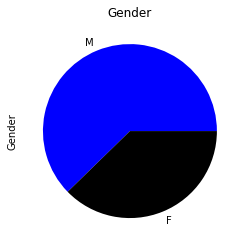

In [53]:
#Now let's do some exploratory data analysis
#First Let's focus on the gender column
df.Gender.value_counts().plot(kind='pie',title= "Gender",colors= ['blue','black'])
plt.show()

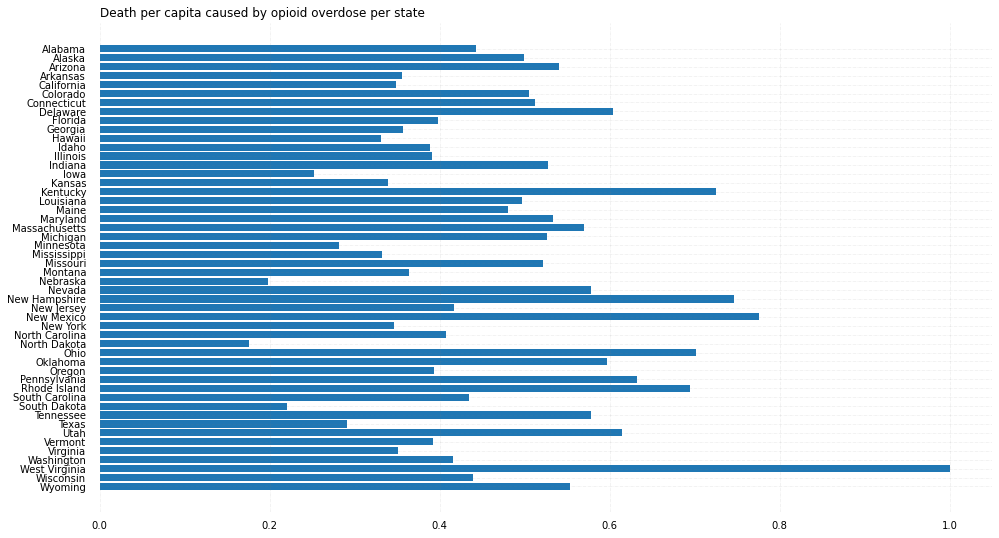

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

 
state = overdose_df['State']
death_rate = Death_Rate_norm
 
fig, ax = plt.subplots(figsize =(16, 9))
 
ax.barh(state, death_rate)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 


ax.set_title('Death per capita caused by opioid overdose per state',
             loc ='left', )
 
plt.show()
#framework done by @jeeteshgavande30
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

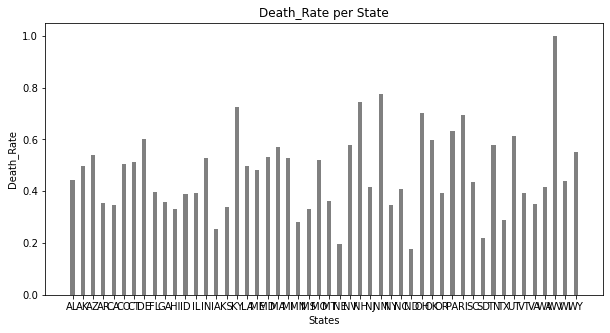

In [ ]:
#Let's draw a graph to see death per capita per state

import numpy as np
import matplotlib.pyplot as plt
states = list(overdose_df.Abbrev)
values = Death_Rate_norm
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(states, values, color ='grey',
        width = 0.4)
 
plt.xlabel("States")
plt.ylabel("Death_Rate")
plt.title("Death_Rate per State")
plt.show()

In [57]:
df = pd.read_csv("prescriber-info.csv")

In [59]:
overdose_df = pd.read_csv("overdoses.csv")

In [61]:
opioids = pd.read_csv("opioids.csv")

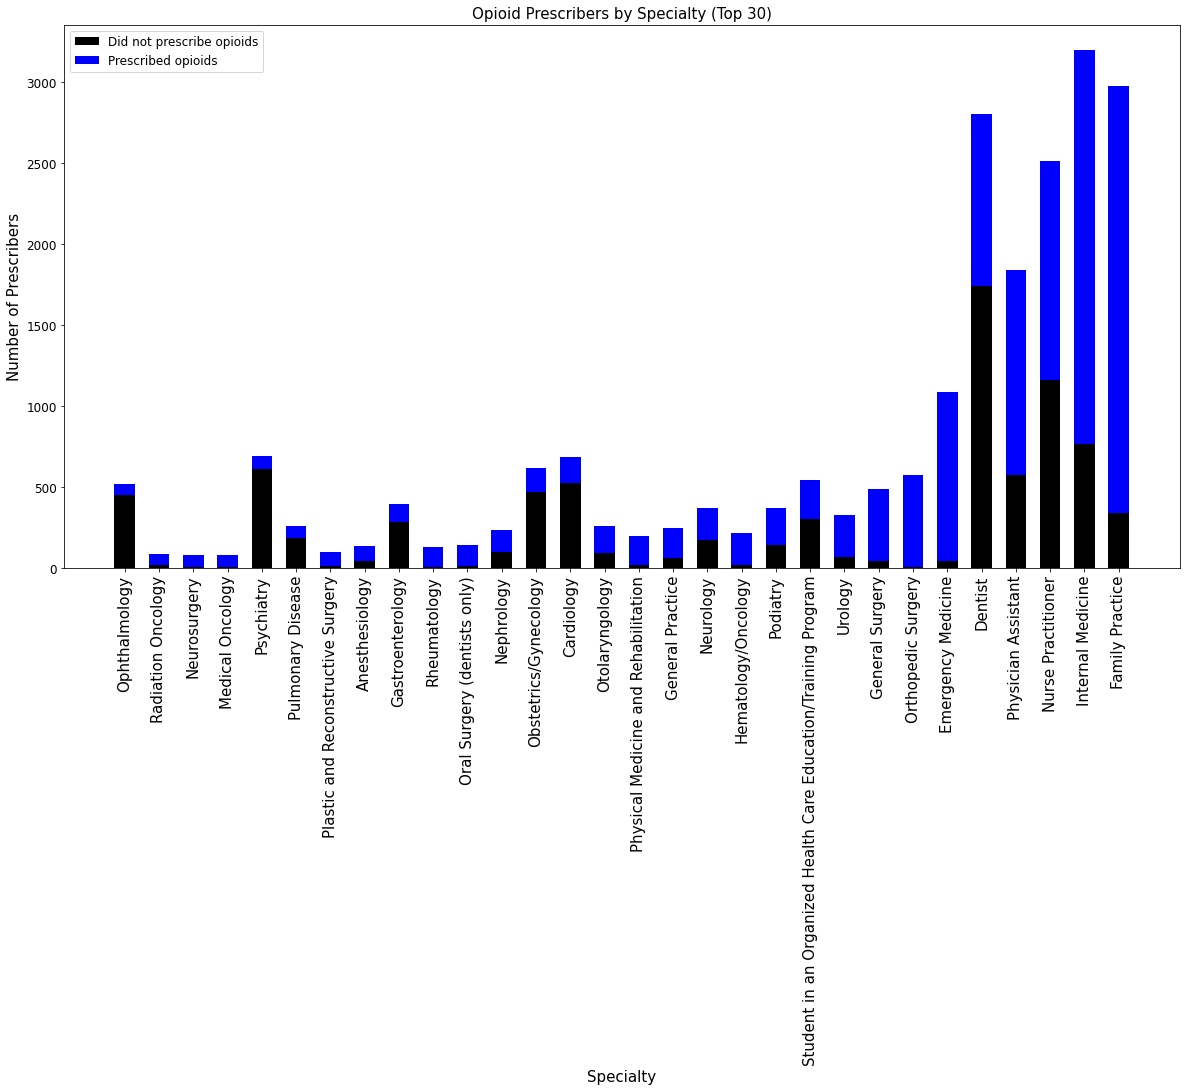

In [62]:
### reference from https://www.kaggle.com/code/greenmaverick/exploratory-analysis-on-opioid-prescriptions

SpecialtyCount = pd.DataFrame(df[['Specialty','NPI']].groupby('Specialty').count())

SpecialtyCount.reset_index(level=0, inplace=True)

SpecialtyCount.columns = ['Specialty', 'Total_Prescribers']

SpecialtyCount_PrescribedOpiods = pd.DataFrame(df.loc[df['Opioid.Prescriber']>0,['Specialty','NPI']].groupby('Specialty').count())
SpecialtyCount_PrescribedOpiods.reset_index(level=0, inplace=True)

SpecialtyCount_PrescribedOpiods.columns = ['Specialty', 'Opiod_Prescribers']
SpecialtyCount = pd.merge(SpecialtyCount, SpecialtyCount_PrescribedOpiods,  how='left', on="Specialty")

SpecialtyCount = SpecialtyCount.fillna(0)

SpecialtyCount = SpecialtyCount.sort_values('Opiod_Prescribers')

SpecialtyCount = SpecialtyCount[-30::]

fig = plt.gcf()
fig.set_size_inches( 20, 10)

N = SpecialtyCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, SpecialtyCount['Total_Prescribers']-SpecialtyCount['Opiod_Prescribers'], width, color='black')
p2 = plt.bar(ind, SpecialtyCount['Opiod_Prescribers'], width, bottom=SpecialtyCount['Total_Prescribers']-SpecialtyCount['Opiod_Prescribers'], color='b')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,SpecialtyCount['Specialty'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("Opioid Prescribers by Specialty (Top 30)", fontsize=15)
plt.legend([p1[0], p2[0]], ["Did not prescribe opioids","Prescribed opioids"], fontsize=12, fancybox=True)
plt.show()

In [63]:
print(float(df['Opioid.Prescriber'].sum())*100/df.shape[0],"%")

58.752 %


In [64]:
import re
ops = list(re.sub(r'[-\s]','.',x) for x in opioids.values[:,0])
prescribed_ops = list(set(ops) & set(df.columns))

In [65]:
df['NumOpioids'] = df.apply(lambda x: sum(x[prescribed_ops]),axis=1)

<AxesSubplot:>

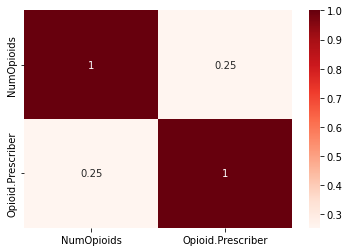

In [66]:
sns.heatmap(df[['NumOpioids','Opioid.Prescriber']].corr(), annot=True, cmap = 'Reds')


# 2. PCA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib as mpl


In [ ]:
prescriber = pd.read_csv('clean_prescriber.csv')
prescriber.head(5)

,Gender_is__M,State_is__AL,State_is__AR,State_is__AZ,State_is__CA,State_is__CO,State_is__CT,State_is__DC,State_is__DE,State_is__FL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [ ]:
X = prescriber.iloc[:,:-1]
y = prescriber['Opioid.Prescriber']

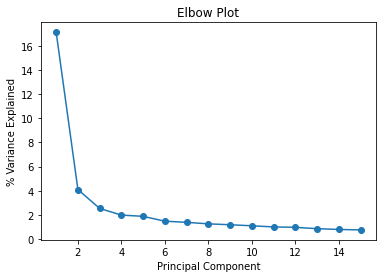

In [ ]:
X_z = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
pcs = PCA().fit(X_z)
explained_variance_ratio_10 = pcs.explained_variance_ratio_[:15]
plt.plot(np.arange(1, len(explained_variance_ratio_10)+1, 1), explained_variance_ratio_10*100, "o-")
# plt.plot(np.arange(1, len(pcs.explained_variance_ratio_)+1, 1), pcs.explained_variance_ratio_*100, "o-")
plt.xlabel("Principal Component")
plt.ylabel("% Variance Explained")
plt.title("Elbow Plot")
plt.show()


In [ ]:
pca_result = PCA(n_components=2).fit_transform(X_z)
pca_X = pd.DataFrame( columns=['pca_dim_1','pca_dim_2','y'])
pca_X.pca_dim_1, pca_X.pca_dim_2, pca_X.y = pca_result[:,0],pca_result[:,1],y
pca_X

,pca_dim_1,pca_dim_2,y
0,-3.239835,-0.103697,1
1,-0.908053,0.742855,1
2,-2.381004,1.416773,0
3,0.421750,-0.058133,1
4,-2.716133,0.003233,1
...,...,...,...
24985,-0.367991,-0.640194,1
24986,-2.329987,-0.030673,1
24987,-3.173221,-0.108223,1
24988,-1.787660,-0.164481,1


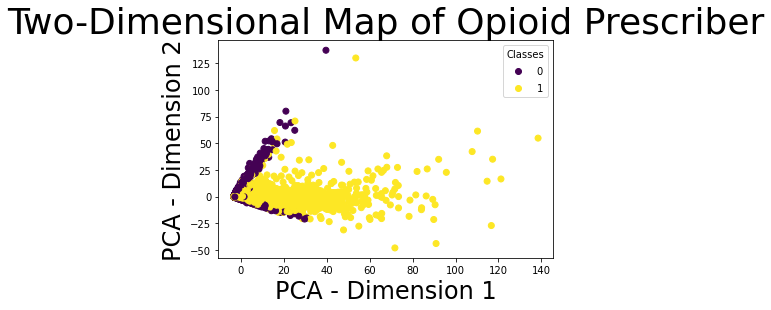

In [ ]:
scatter = plt.scatter(pca_X.pca_dim_1, pca_X.pca_dim_2, c=pca_X.y)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title('Two-Dimensional Map of Opioid Prescriber', fontsize=36)
plt.xlabel('PCA - Dimension 1', fontsize=24)
plt.ylabel('PCA - Dimension 2', fontsize=24)
plt.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


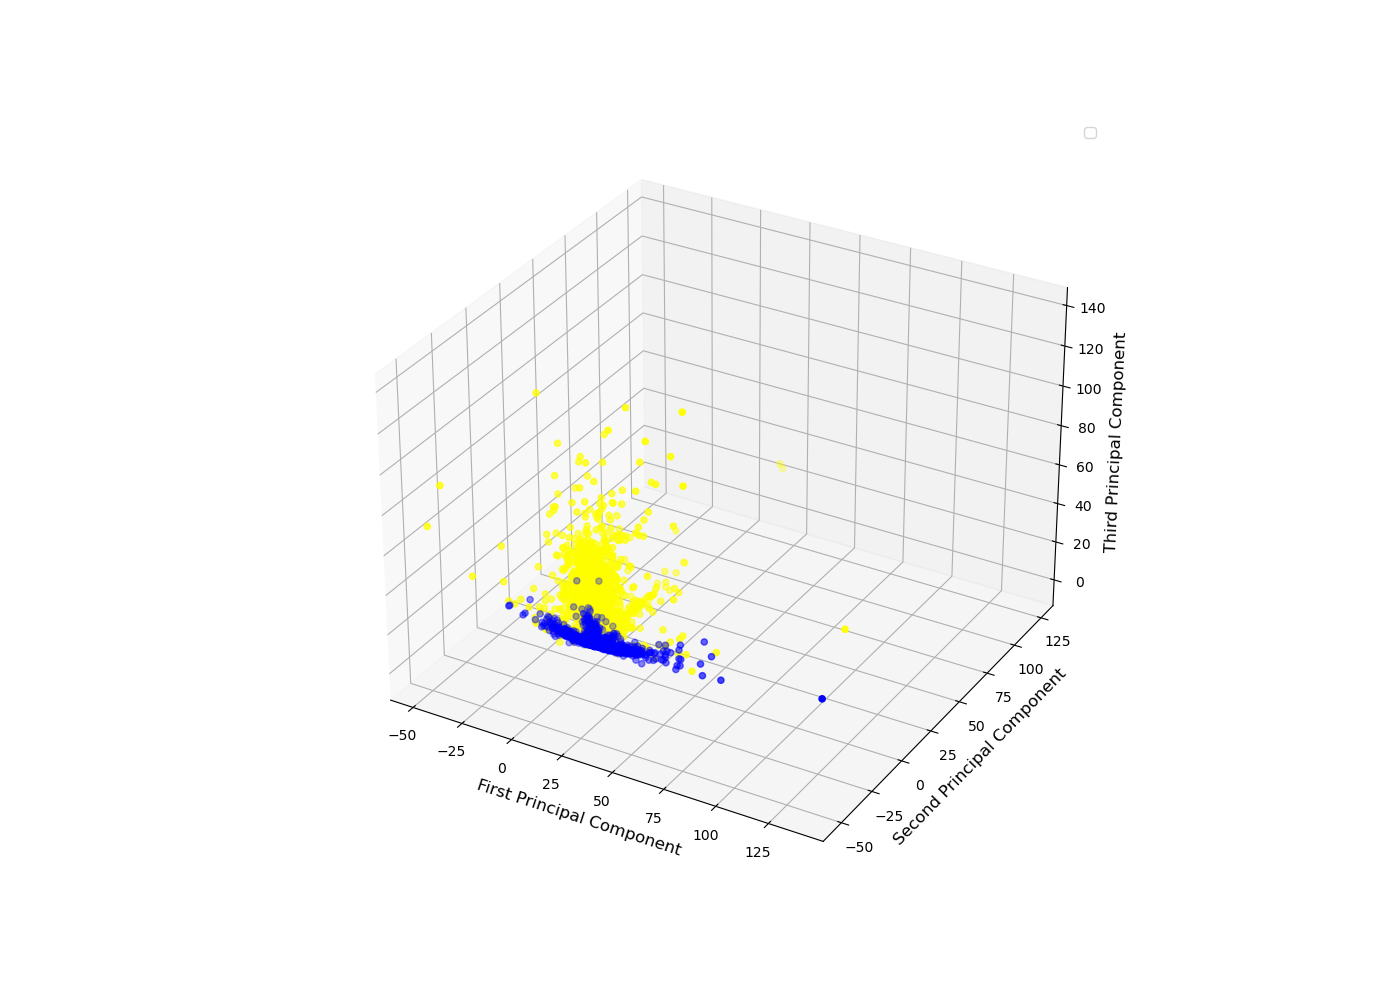

In [ ]:
### Reference from https://stackoverflow.com/questions/65241847/how-to-plot-3d-pca-with-different-colors
%matplotlib widget

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_pca = PCA(n_components=3).fit_transform(X_z)

Xax = X_pca[:,1]
Yax = X_pca[:,2]
Zax = X_pca[:,0]

cdict = {0:'blue',1:'yellow'}


fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=12)
ax.set_ylabel("Second Principal Component", fontsize=12)
ax.set_zlabel("Third Principal Component", fontsize=12)

ax.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_z, y, test_size=0.3, random_state=265)
lr = LogisticRegression(max_iter=5000, n_jobs=-1).fit(x_train, y_train)
accVal = lr.score(x_test, y_test)
print(accVal)


0.9209016940109377


In [ ]:
print(X_z.shape)
pco1 = PCA(0.9).fit(X_z)
print(pco1.n_components_)
np.cumsum(pco1.explained_variance_ratio_)

(24990, 346)
211


array([0.17118684, 0.21220141, 0.23759718, 0.25747654, 0.2763288 ,
       0.29115261, 0.30503988, 0.31766706, 0.3295554 , 0.34058495,
       0.35067029, 0.36042603, 0.36905478, 0.37705758, 0.38466991,
       0.39149721, 0.39805412, 0.40428992, 0.41037386, 0.41625007,
       0.42179203, 0.42674943, 0.43165883, 0.43640762, 0.44093659,
       0.44529252, 0.4495176 , 0.45365493, 0.45764607, 0.46153654,
       0.46537203, 0.46907356, 0.47272125, 0.47636234, 0.47991538,
       0.4834023 , 0.48682494, 0.49021599, 0.49358409, 0.4969201 ,
       0.50022983, 0.503525  , 0.50680541, 0.51006707, 0.5133049 ,
       0.51652367, 0.51973815, 0.52293986, 0.52612264, 0.52930056,
       0.5324759 , 0.53563335, 0.53877211, 0.54190059, 0.54502576,
       0.54813394, 0.55122855, 0.55431151, 0.55739269, 0.56046165,
       0.5635173 , 0.56656732, 0.56960722, 0.5726421 , 0.57566305,
       0.57867519, 0.58168656, 0.58469245, 0.58769244, 0.59068393,
       0.59366997, 0.59665127, 0.59962924, 0.60260158, 0.60556

In [ ]:
lr = LogisticRegression(solver='saga', penalty='l1', random_state=265, max_iter=5000, n_jobs=-1).fit(x_train, y_train)
accVal = lr.score(x_test, y_test)
print(accVal)


In [ ]:
lr.coef_

array([[ 4.21033475e-02,  1.98201547e-02,  6.40350065e-02,
         4.69688251e-02, -6.45798724e-02,  3.43065521e-02,
        -2.18626835e-02,  1.09436419e-02,  8.63638158e-03,
        -4.45162033e-02, -1.23070509e-02,  1.91701703e-02,
        -8.09430392e-02,  1.06822211e-02, -6.80966657e-02,
        -1.60608984e-02,  8.75081157e-03, -1.11008645e-01,
        -9.67490081e-03, -4.62295418e-02,  0.00000000e+00,
         2.23517402e-03,  1.52717236e-02, -2.05499783e-02,
        -2.16140738e-02, -4.68969290e-02,  2.87508450e-02,
        -6.22800180e-03, -1.23523346e-02, -2.11562602e-02,
         5.06366862e-02, -3.23891775e-02,  5.64243367e-03,
         1.59520831e-02, -1.45662358e-01, -7.04421728e-02,
         8.01154011e-02,  2.19341195e-02, -5.48618929e-02,
        -2.61610508e-02,  1.99648001e-02,  3.36352218e-02,
        -1.68518338e-02, -6.98446038e-03,  0.00000000e+00,
        -1.60811079e-02, -1.20981918e-04, -1.30936208e-02,
         1.48837840e-02, -4.03553394e-02, -1.85660405e-0

# 3. Model Training and Comparison

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

file =pd.read_csv("clean_prescriber.csv")
y = file.pop('Opioid.Prescriber').astype(str)

In [ ]:
X = file
X

,Gender_is__M,State_is__AL,State_is__AR,State_is__AZ,State_is__CA,State_is__CO,State_is__CT,State_is__DC,State_is__DE,State_is__FL,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24985,0,0,0,0,0,0,0,0,0,0,...,13,0,0,0,0,39,0,0,0,0
24986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20,0,0,0,0
24987,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state=265)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state= 265).fit(xtrain, ytrain)
acc = dtc.score(xtest, ytest)
print(acc)

ypred = dtc.predict(xtest)
print(classification_report(ytest, ypred))

0.9039615846338536
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2063
           1       0.93      0.91      0.92      2935

    accuracy                           0.90      4998
   macro avg       0.90      0.90      0.90      4998
weighted avg       0.90      0.90      0.90      4998



In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=100, random_state=265).fit(xtrain, ytrain)
acc1 = rfc.score(xtest, ytest)
print(acc1)

ypred1 = rfc.predict(xtest)
print(classification_report(ytest, ypred1))

0.9227691076430572
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2063
           1       0.96      0.91      0.93      2935

    accuracy                           0.92      4998
   macro avg       0.92      0.93      0.92      4998
weighted avg       0.93      0.92      0.92      4998



In [ ]:
# Kmean
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=2,init='k-means++', n_init=10).fit(xtrain)
ypred2 = kmeans.predict(xtest)

cm = confusion_matrix(ytest.astype(float),ypred2.astype(float))
accuracy = float(cm.diagonal().sum())/len(ytest)
print("\nAccuracy Of Kmean For The Given Dataset : ", accuracy)

print(classification_report(ytest.astype(float), ypred2.astype(float)))




Accuracy Of Kmean For The Given Dataset :  0.48699479791916767
              precision    recall  f1-score   support

         0.0       0.45      0.99      0.62      2063
         1.0       0.97      0.13      0.23      2935

    accuracy                           0.49      4998
   macro avg       0.71      0.56      0.42      4998
weighted avg       0.75      0.49      0.39      4998



In [ ]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
# n_neighbors is the k value; Should test this model using different k
knn = KNeighborsClassifier(n_neighbors = 17).fit(xtrain, ytrain)
acc3 = knn.score(xtest, ytest)
print(acc3)

ypred3 = knn.predict(xtest)
print(classification_report(ytest, ypred3))


0.8723489395758304
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2063
           1       0.95      0.82      0.88      2935

    accuracy                           0.87      4998
   macro avg       0.87      0.88      0.87      4998
weighted avg       0.89      0.87      0.87      4998



In [ ]:
# SVM classifier
from sklearn.svm import SVC
clf = SVC(kernel='rbf').fit(xtrain, ytrain)
ypred4 = clf.predict(xtest)
cm = confusion_matrix(ytest.astype(float),ypred4.astype(float))
accuracy = float(cm.diagonal().sum())/len(ytest)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

print(classification_report(ytest, ypred4))



Accuracy Of SVM For The Given Dataset :  0.8809523809523809
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2063
           1       0.98      0.82      0.89      2935

    accuracy                           0.88      4998
   macro avg       0.88      0.89      0.88      4998
weighted avg       0.90      0.88      0.88      4998



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(xtrain, ytrain)

#Predict the response for test dataset
ypred5 = gnb.predict(xtest)

cm = confusion_matrix(ytest.astype(float),ypred5.astype(float))
accuracy = float(cm.diagonal().sum())/len(ytest)
print("\nAccuracy Of Naive Bayes For The Given Dataset : ", accuracy)

print(classification_report(ytest, ypred5))


Accuracy Of Naive Bayes For The Given Dataset :  0.9099639855942377
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2063
           1       0.95      0.89      0.92      2935

    accuracy                           0.91      4998
   macro avg       0.91      0.91      0.91      4998
weighted avg       0.91      0.91      0.91      4998



In [ ]:
# Logestic regression
from sklearn.linear_model import LogisticRegression
LR  = LogisticRegression()
LR.fit(xtrain, ytrain)
ypred6 = LR.predict(xtest)
cm = confusion_matrix(ytest.astype(float),ypred6.astype(float))
accuracy = float(cm.diagonal().sum())/len(ytest)
print("\nAccuracy Of Logistic Regression For The Given Dataset : ", accuracy)
print(classification_report(ytest, ypred6))


Accuracy Of Logistic Regression For The Given Dataset :  0.9213685474189676
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2063
           1       0.98      0.88      0.93      2935

    accuracy                           0.92      4998
   macro avg       0.92      0.93      0.92      4998
weighted avg       0.93      0.92      0.92      4998



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


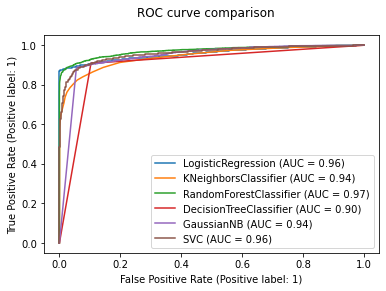

<Figure size 1440x720 with 0 Axes>

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

logreg_disp = RocCurveDisplay.from_estimator(LR, xtest, ytest)

logreg_disp.figure_.suptitle("ROC curve for logistic regression")
KNN_disp = RocCurveDisplay.from_estimator(knn, xtest, ytest, ax=logreg_disp.ax_)
RF_disp = RocCurveDisplay.from_estimator(rfc, xtest, ytest, ax=logreg_disp.ax_)
DT_disp = RocCurveDisplay.from_estimator(dtc, xtest, ytest, ax=logreg_disp.ax_)
NB_disp = RocCurveDisplay.from_estimator(gnb, xtest, ytest, ax=logreg_disp.ax_)
CLF_disp = RocCurveDisplay.from_estimator(clf, xtest, ytest, ax=logreg_disp.ax_)
logreg_disp.figure_.suptitle("ROC curve comparison")
plt.figure(figsize = (20,10))
plt.show()